---
> 授業ではディープニューラルを主に扱うということだったので、それ以前の古典的な機械学習についてもここでまとめておこうと思います。
---

# 教師あり学習:回帰(数値の予測)

線形　 ー 単回帰分析・**重回帰分析**・Ridge回帰・Lasso回帰  
非線形 ー 決定木・ランダムフォレスト・ニューラルネットワーク  
(勾配ブースティング XGBoost  LightGBM)  
  
**太字は実装済み**

## 重回帰 (LinearRegression)
$ w_1, w_2 …w_n 　b(バイアス) $を決める  
バイアスは重みでは決定できない切片のようなもの

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
dataset = fetch_california_housing()

In [5]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
x = dataset.data
t = dataset.target
columns = dataset.feature_names

In [7]:
type(x), x.shape

(numpy.ndarray, (20640, 8))

In [8]:
df = pd.DataFrame(x, columns=columns)

In [9]:
df['target'] = t

In [10]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size=0.3, random_state=0) # random_state->乱数を固定,実行毎に結果を一定にする

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

### 学習

In [15]:
model.fit(x_train, t_train)

LinearRegression()

In [16]:
model.coef_ # 重み

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

<BarContainer object of 8 artists>

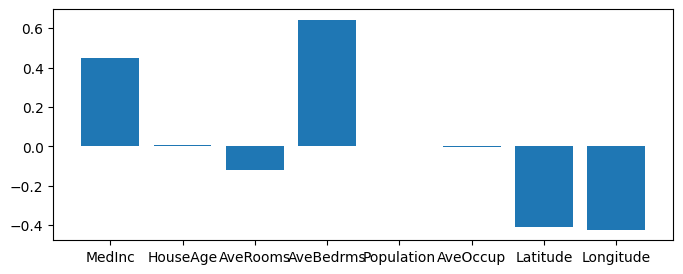

In [17]:
plt.figure(figsize=(8,3))  # 重みの可視化
plt.bar(x=columns, height=model.coef_)

In [18]:
model.intercept_ # バイアス

-36.01222888765237

回帰の評価指標として決定係数を用いる。  
1に近いほど良いモデルであり、0に近いほど予測ができていない

In [19]:
print("train score: {}".format(model.score(x_train, t_train)))
print("test  score: {}".format(model.score(x_test, t_test)))

train score: 0.6112941337977225
test  score: 0.5926087785518772


### 推論

In [20]:
y = model.predict(x_test)

In [21]:
print("予測値: {}".format(y[1]))
print("目標値: {}".format(t_test[1]))

予測値: 2.7905991198370472
目標値: 2.413


今回過学習は確認できなかったが重回帰でよく問題になる**多重共線性**についてまとめる。**多重共線性**は説明変数の中に相関係数の大きい変数が含まれているときにおこる現象である。多重共線性の有名な解決策として**PLS**を紹介する。

<Axes: >

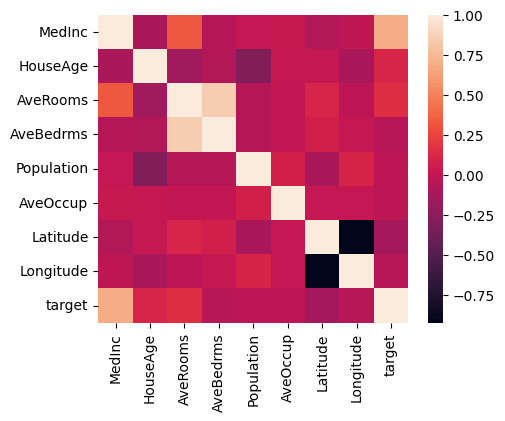

In [22]:
plt.figure(figsize=(5,4))# 説明変数どうしの相関の可視化
sns.heatmap(df.corr())

In [23]:
# sns.jointplot(x='AveRooms', y='AveBedrms', data=df)

PLSは入力値(説明変数)の次元を変更することである。たとえば5つの変数があった時にPLSを実行することにより4つに変数を削減する。

In [24]:
from sklearn.cross_decomposition import PLSRegression

In [28]:
pls = PLSRegression(n_components=5) #n_components -> ハイパーパラメータ

In [29]:
pls.fit(x_train, t_train)

PLSRegression(n_components=5)

In [30]:
print("train score: {}".format(pls.score(x_train, t_train)))
print("test  score: {}".format(pls.score(x_test, t_test)))

train score: 0.6092321885444123
test  score: 0.586168254178743


今回もともとのLinerRegressionで過学習が確認できなかったため決定係数が小さくなっただけのように思えるが過学習がおこるようなときには大きな解決策となりえる。

# 教師あり学習:分類(クラスの予測)

線形　 ー 単純パーセプトロン・線形サポートベクトルマシン・ロジスティック回帰  
非線形 ー k-近傍法・**決定木(分類木)**・ランダムフォレスト  
　　　　・**非線形サポートベクトルマシン**・ニューラルネットワーク  
(アンサンブル学習　 XGBoost  LightGBM)  
  
**太字は実装済み**

## 決定木(DecisionTreeClassifier)
- 過学習を抑えるためのハイパーパラメータ
 - max_depth (木構造の深さの上限)  
   構造の深さが深いと表現力が柔軟になる。(訓練データに忠実(すぎる))上限が低いとモデルの表現力が低下し過学習を抑える。  
 - min_sample_split (木構造の分岐先の値の数)  
   分岐先のサンプル数の最低値を設定する。少なすぎると訓練データに忠実になり過学習に陥る。

In [31]:
from sklearn.datasets import load_iris

In [32]:
dataset = load_iris()

In [34]:
x = dataset.data
t = dataset.target
columns = dataset.feature_names

In [35]:
np.unique(t)

array([0, 1, 2])

In [37]:
x.shape

(150, 4)

In [39]:
x_train, x_test, t_train, t_test = train_test_split(x,t, test_size=0.3, random_state=0)

In [41]:
x_train.shape

(105, 4)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier(random_state=0)

In [46]:
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

  精度Accuracy(正解率)を求める

In [47]:
print("train: {}".format(model.score(x_train,t_train)))
print("test : {}".format(model.score(x_test,t_test)))

train: 1.0
test : 0.9777777777777777


In [48]:
y = model.predict(x_test)

In [49]:
print("予測値:{}".format(y[0]))
print("目標値:{}".format(t_test[0]))

予測値:2
目標値:2


In [50]:
import graphviz
from sklearn.tree import export_graphviz

In [52]:
dot_data = export_graphviz(model)

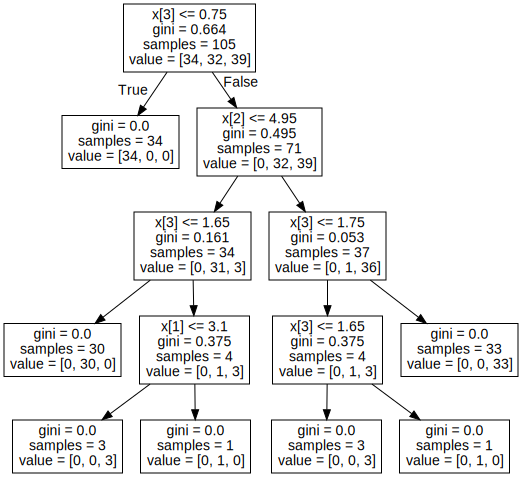

In [53]:
graphviz.Source(dot_data)

In [54]:
feature_importance = model.feature_importances_ # 決定木における特徴量の重要度

<BarContainer object of 4 artists>

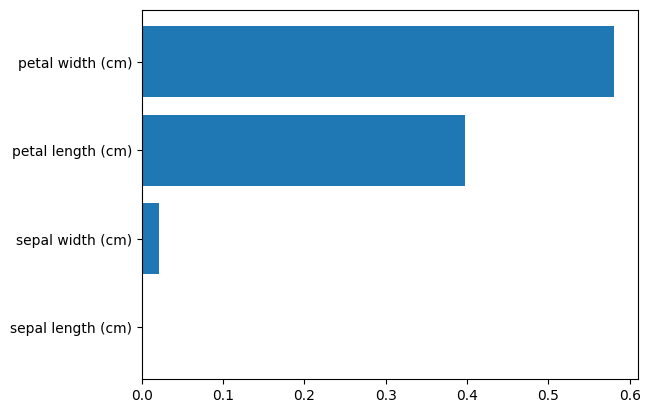

In [55]:
y = columns
width = feature_importance
plt.barh(y=y, width=width) # 可視化

## SVM(サポートベクトルマシン) (SVC)
- 一般的に標準化が必要

In [56]:
from sklearn.svm import SVC

In [57]:
model = SVC()

In [58]:
model.fit(x_train, t_train)

SVC()

In [59]:
print("train:{}".format(model.score(x_train, t_train)))
print("test :{}".format(model.score(x_test, t_test)))

train:0.9714285714285714
test :0.9777777777777777


### 標準化

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [84]:
scaler.fit(x)

StandardScaler()

In [85]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [86]:
x_test_std.mean()

-0.06357691717443194

In [87]:
model_svc = SVC()

In [88]:
model_svc.fit(x_train_std, t_train)

SVC()

In [89]:
print("train:{}".format(model_svc.score(x_train_std, t_train)))
print("test:{}".format(model_svc.score(x_test_std, t_test)))

train:0.9714285714285714
test:0.9777777777777777


今回用意したデータセットはもともと特徴量のスケール(単位)が統一なので変化はなかった。